This project aims to analyze a set of video game sales data to identify patterns that can determine the success or failure of a game. The analysis will focus on factors such as platforms, genres, user and expert ratings, and historical sales. The results obtained will be used to develop strategies to identify promising projects and plan effective advertising campaigns.

In [173]:
#Load all libraries
import pandas as pd
from scipy import stats as st
import math as mt
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from scipy.stats import levene, ttest_ind

# Step 1. Open the data file and study the general information

In [174]:
#Load the data file
df = pd.read_csv('games.csv')

# Step 2. Prepare the data

In [175]:
#Print the general/summarized information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [176]:
#print the first rows of the Dataframe 
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [177]:
#Column correction
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [178]:
#data type conversion
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['user_score'] = pd.to_numeric(df['user_score'],errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


In [179]:
#data type conversion
df['year_of_release'] = df['year_of_release'].dt.year

In [180]:
#Treat empty values
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].mean())
df['user_score'] = df['user_score'].fillna(df['user_score'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


The year of release column should be of type datetime and the user score column, since they are decimal numbers, should be of type float to facilitate later operations.

In [181]:
#Treat empty values
missing = df['name'].isnull()
missing_v = missing[missing == True]
missing_v

659      True
14244    True
Name: name, dtype: bool

In [182]:
#Validate previous process
df.loc[659]

name                     NaN
platform                 GEN
year_of_release       1993.0
genre                    NaN
na_sales                1.78
eu_sales                0.53
jp_sales                 0.0
other_sales             0.08
critic_score       68.967679
user_score          7.125046
rating                   NaN
Name: 659, dtype: object

In [183]:
#Drop empty values for 'name'
df = df.dropna(subset=['name'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


The missing values ​​in this case are not worth replacing with 0 because that would affect the score of the game, it would seem that it has a score of 0, when in reality it is not known what the score is, since they have not been evaluated, do not eliminate the majority either. since the sales information is useful to us. Only eliminate the missing values ​​from the name column since if we do not have the name of the game and we do not have scores and genre in this case, it is not worth taking those rows into account.

In [184]:
#total sales column calculation
df['total_sales'] = df['na_sales'] + df['eu_sales']+ df['jp_sales']+ df['other_sales']

In [185]:
#print the first rows of the Dataframe 
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,NaN,31.38


# Step 3. Analyze the data

In [186]:
#Analyze general information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


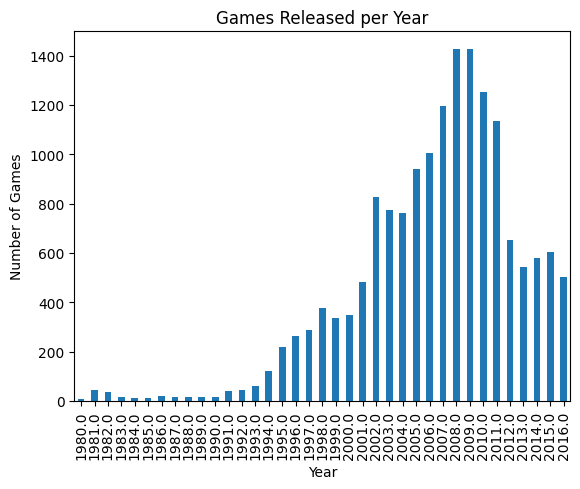

In [187]:
# Group the DataFrame by 'year_of_release' and count the number of games released in each year
games_year = df.groupby('year_of_release')['name'].count() 

# Create a bar chart to visualize the number of games released per year
games_year.plot(kind = 'bar', title='Games Released per Year', xlabel = 'Year', ylabel='Number of Games')

# Display the chart
plt.show()

In [188]:
#Create dataframe for data from the year 2011
df_from_2011 = df[df['year_of_release']>=2011]

In [189]:
# Group the DataFrame by 'platform' and sum the 'total_sales' for each platform
sales_platform = df_from_2011.groupby('platform')[['total_sales']].sum() 

# Sort the platforms by total sales in descending order
sales_platform = sales_platform.sort_values('total_sales', ascending=False) 

# Reset the index to create a regular DataFrame with a column for 'platform'
sales_platform = sales_platform.reset_index() 

# Select the top 6 platforms with the highest sales
sales_platform_top = sales_platform.head(6) 

# Display the top 6 platforms and their total sales
print(sales_platform_top)

  platform  total_sales
0      PS3       445.57
1     X360       380.38
2      PS4       314.14
3      3DS       257.81
4     XOne       159.32
5       PC        97.68


In [190]:
# Display the top 6 unique values
top = sales_platform_top['platform'].unique()
top

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC'], dtype=object)

In [191]:
# Group the DataFrame by 'platform' and 'year_of_release' and calculate the sum of total sales for each combination
platform_year = df_from_2011.groupby(['platform', 'year_of_release'])[['total_sales']].sum().reset_index() 

# Display the resulting DataFrame
platform_year

,platform,year_of_release,total_sales
0,3DS,2011.0,63.20
1,3DS,2012.0,51.36
2,3DS,2013.0,56.57
3,3DS,2014.0,43.76
4,3DS,2015.0,27.78
5,3DS,2016.0,15.14
6,DS,2011.0,26.18
7,DS,2012.0,11.01
8,DS,2013.0,1.54
9,PC,2011.0,35.03


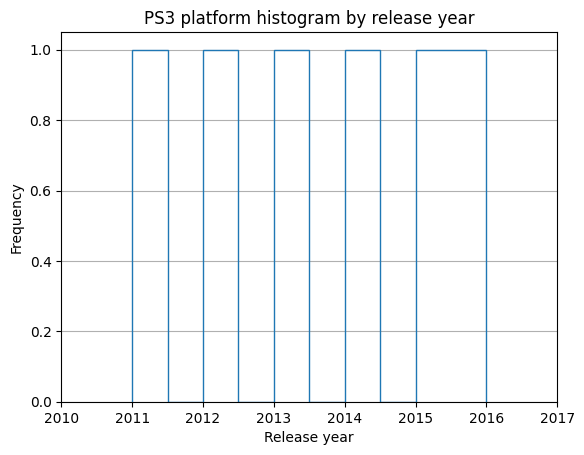

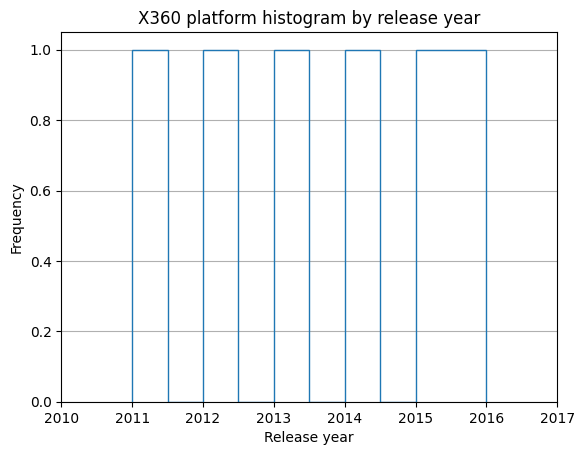

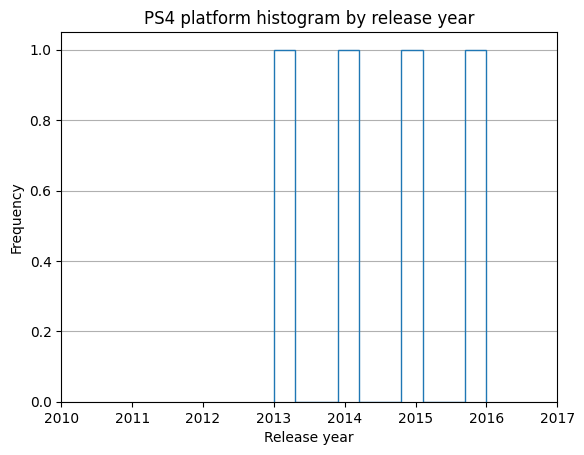

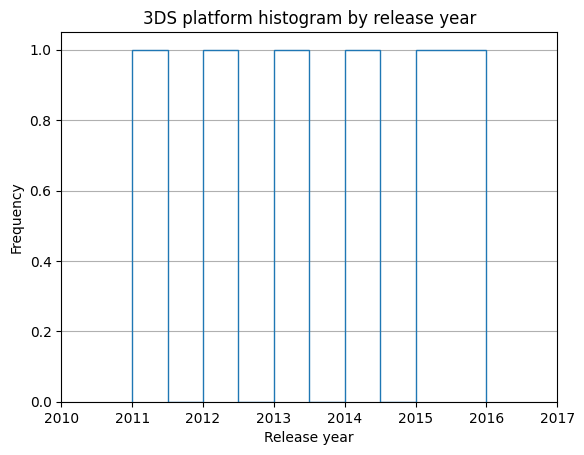

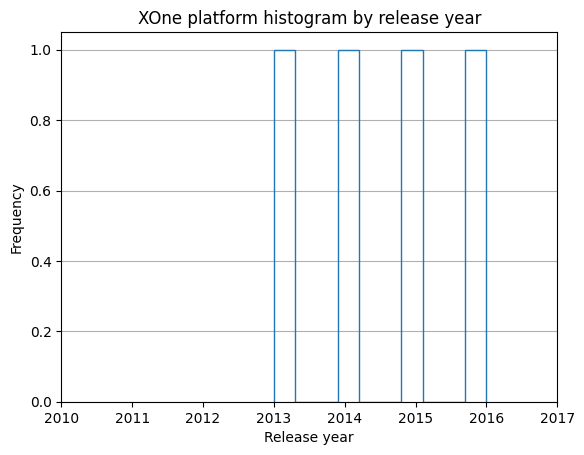

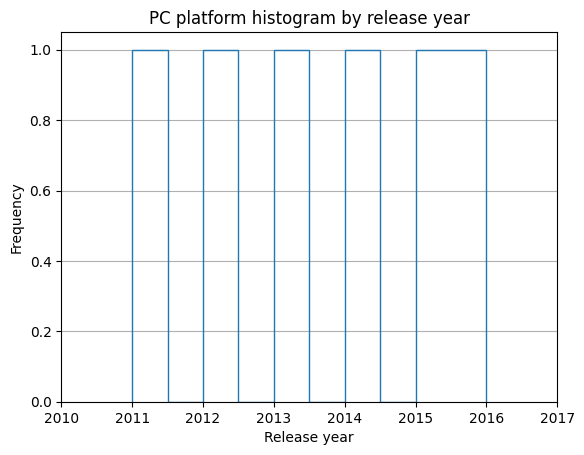

In [209]:
# Iterate through each unique platform in the top selling platforms
for platform in sales_platform_top['platform'].unique():
    # Filter the platform_year DataFrame to select data for the current platform
    platform_data = platform_year[platform_year['platform'] == platform] 
    
    # Create a histogram for the year of release of games on the current platform
    platform_data['year_of_release'].plot(kind='hist', 
                                       histtype='step', 
                                       stacked=True, 
                                       fill=False, 
                                       label=platform) 
    
    # Set x-axis label
    plt.xlabel('Release year') 
    
    # Set x-axis limits
    plt.xlim(2010,2017) 
    
    # Set plot title
    plt.title(''+platform+' platform histogram by release year') 
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=0) 
    
    
    # Add gridlines to the y-axis
    plt.grid(axis='y') 
    
    # Display the plot (optional, as this will create multiple overlapping plots)
    plt.show()

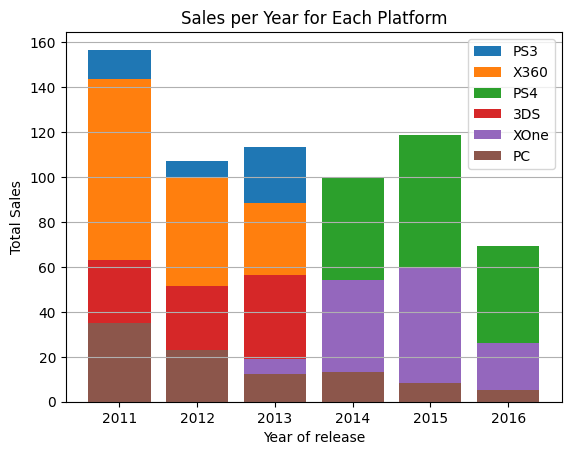

In [ ]:
# Iterate over each unique platform in the top-selling platforms
for platform in sales_platform_top['platform'].unique():
    # Filter the data for the current platform
    platform_data = platform_year[platform_year['platform'] == platform]  
    # Create a bar chart for the selected platform
    plt.bar(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

# Add labels and title to the plot
plt.xlabel('Year of release')
plt.ylabel('Total Sales')
plt.legend(loc='upper right')
plt.title('Sales per Year for Each Platform')
plt.xticks(rotation=0)
plt.grid(axis='y')

Of the 6 platforms with the most sales, those that have lost popularity are the PC platform, 3DS, X360 and PS3. It can be seen that reaching the year 2014 the sales are zero, while for XONE and PS4, the sales are still present in the year 2016.

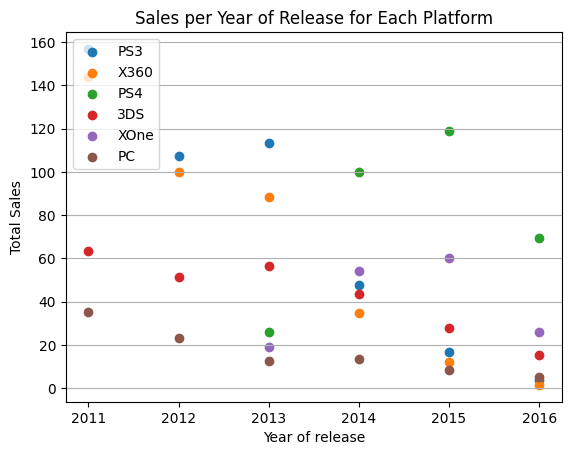

In [ ]:
# Determine the relevant period for data analysis.
for platform in sales_platform_top['platform'].unique():
    # Filter the data for the specific platform
    platform_data = platform_year[platform_year['platform'] == platform] 
    # Create a scatter plot of total sales vs. year of release for the platform
    plt.scatter(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

# Set labels and title for the plot
plt.xlabel('Year of release')
plt.ylabel('Total Sales')
plt.legend(loc='upper left')
plt.title('Sales per Year of Release for Each Platform')
plt.xticks(rotation=0)
plt.grid(axis='y') 

# Display the plot
plt.show()

According to the distribution of the data, I take the information from the year 2011.

In [ ]:
# Filter the data to include only the top 6 platforms 
platform_year_top6 = platform_year.query('platform in @top')[['total_sales','platform','year_of_release']] 

# Display the filtered DataFrame
platform_year_top6

,total_sales,platform,year_of_release
0,63.20,3DS,2011.0
1,51.36,3DS,2012.0
2,56.57,3DS,2013.0
3,43.76,3DS,2014.0
4,27.78,3DS,2015.0
5,15.14,3DS,2016.0
9,35.03,PC,2011.0
10,23.22,PC,2012.0
11,12.38,PC,2013.0
12,13.28,PC,2014.0


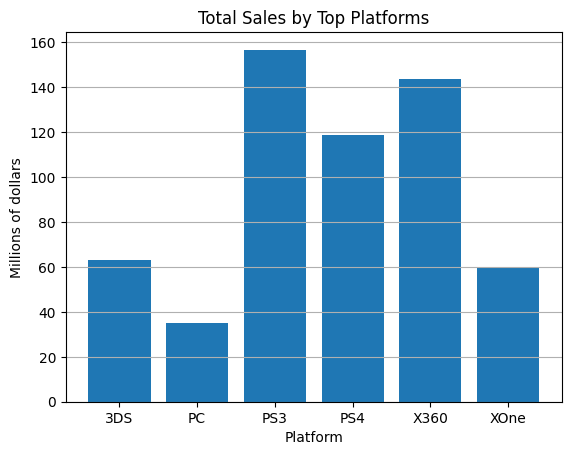

In [ ]:
# Create a bar chart to visualize total sales for the top 6 platforms
plt.bar(platform_year_top6['platform'], platform_year_top6['total_sales'])

# Add labels to the x and y axes
plt.xlabel('Platform')
plt.ylabel('Millions of dollars')

# Set the chart title
plt.title('Total Sales by Top Platforms')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add a grid to the y-axis for easier visualization
plt.grid(axis='y')

# Display the chart
plt.show()

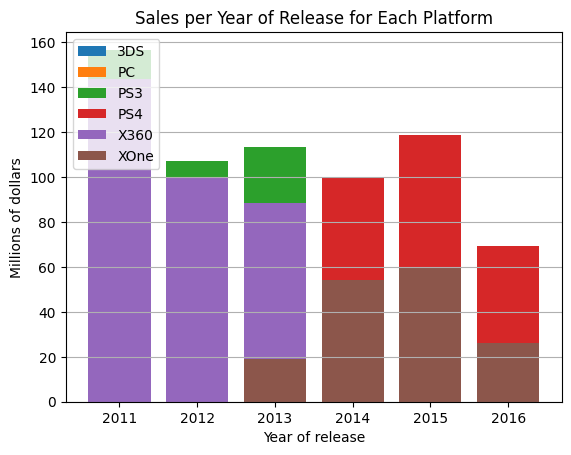

In [ ]:
# This loop iterates through each unique platform in the 'platform_year_top6' DataFrame
for platform in platform_year_top6['platform'].unique():

  # Filter data for the current platform by selecting rows where 'platform' matches
  platform_data1 = platform_year_top6[platform_year_top6['platform'] == platform]

  # Create a bar chart to visualize sales per year of release for the current platform
  plt.bar(platform_data1['year_of_release'], platform_data1['total_sales'], label=platform)

# Set labels and title for the chart
plt.xlabel('Year of release')
plt.ylabel('Millions of dollars')
plt.legend(loc='upper left')  # Place the legend in the upper left corner
plt.title('Sales per Year of Release for Each Platform')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on the y-axis

# By analyzing the slopes of the lines in this chart, you can potentially identify 
# platforms that are experiencing growth (increasing sales over time) or decline 
# (decreasing sales over time). Platforms with consistently high sales across 
# different years might be considered strong contenders for profitability.

The leading platform in sales, in the last 3 years, is PS4 and XOne, while X360 and PS3 are decreasing.

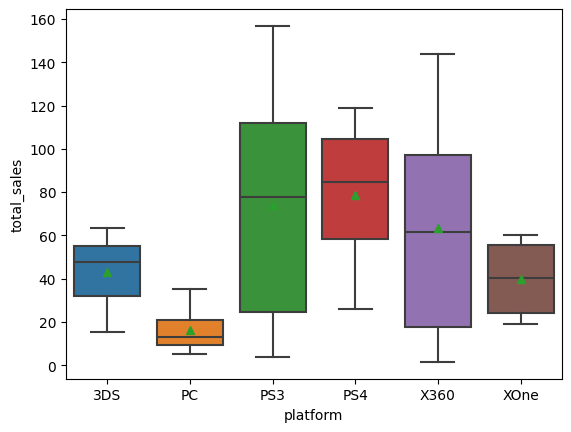

In [ ]:
# Create a boxplot to visualize the distribution of total sales for each platform
sns.boxplot(x='platform', y='total_sales', data=platform_year_top6, showmeans=True)
plt.show()

The sales of the different platforms are significant since the average varies by approximately 20 million dollars for the DS and PS2 platforms. For the PS3, Wii and X360 platforms the average is similar. However, the distribution of the data is notably different for each platform, depending on the distances between Q1, 2 and 3.

In [ ]:
# Filter the DataFrame to include only games on the Wii platform
df_wii = df[df['platform']=='Wii'] 

# Sort the filtered DataFrame by year of release in ascending order
df_wii.sort_values('year_of_release',ascending = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
10414,Ennichi no Tatsujin,Wii,2006.0,Misc,0.00,0.00,0.10,0.00,68.967679,7.125046,NaN,0.10
6232,Avatar: The Last Airbender,Wii,2006.0,Adventure,0.23,0.02,0.00,0.02,56.000000,5.800000,E10+,0.27
4817,Marvel: Ultimate Alliance,Wii,2006.0,Role-Playing,0.36,0.00,0.00,0.03,73.000000,7.300000,T,0.39
7323,Rampage: Total Destruction,Wii,2006.0,Action,0.19,0.01,0.00,0.02,46.000000,5.600000,E10+,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...
15081,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,0.00,0.00,0.02,0.00,68.967679,7.125046,NaN,0.02
15267,Saint,Wii,NaN,Shooter,0.02,0.00,0.00,0.00,68.967679,7.125046,E10+,0.02
15557,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,0.00,0.00,0.02,0.00,68.967679,7.125046,NaN,0.02
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.00,68.967679,7.125046,NaN,0.01


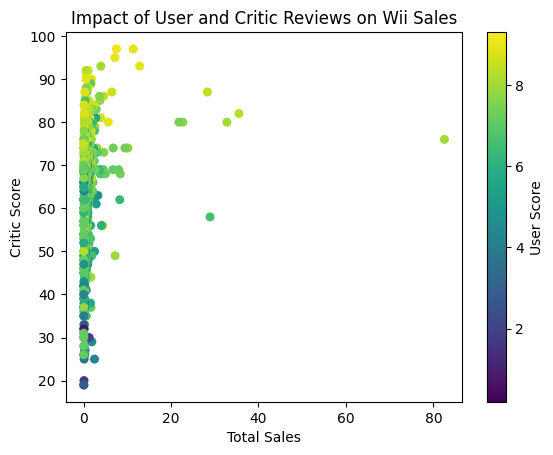

In [ ]:
# Define the color map for the scatter plot (viridis is a perceptually uniform colormap)
cmap = 'viridis'

# Create a scatter plot
plt.scatter(
    # X-axis: Total sales of Wii games
    df_wii['total_sales'],
    # Y-axis: Critic score of Wii games
    df_wii['critic_score'],
    # Color of each data point based on the user score of the Wii game
    c=df_wii['user_score'],
    # Use the defined colormap
    cmap=cmap,
    # Size of each data point
    s=30
)

# Add a colorbar to the plot to represent the user score range
plt.colorbar(label='User Score')

# Label the axes
plt.xlabel('Total Sales')
plt.ylabel('Critic Score')

# Set the plot title
plt.title('Impact of User and Critic Reviews on Wii Sales')

# Display the plot
plt.show()

It is notable that games that have scores between 8 -10 or 80 -100 have higher sales.

In [ ]:
# Filter the DataFrame to include only rows where the platform is NOT 'Wii'
df_not_wii = df[df['platform'] != 'Wii']


In [ ]:
# Create a new DataFrame named df_wii_games
df_wii_games = df_not_wii.query('name in @df_wii.name')

# Filter df_not_wii based on the condition in the query
df_wii_games = df_not_wii[df_not_wii['name'].isin(df_wii['name'])]

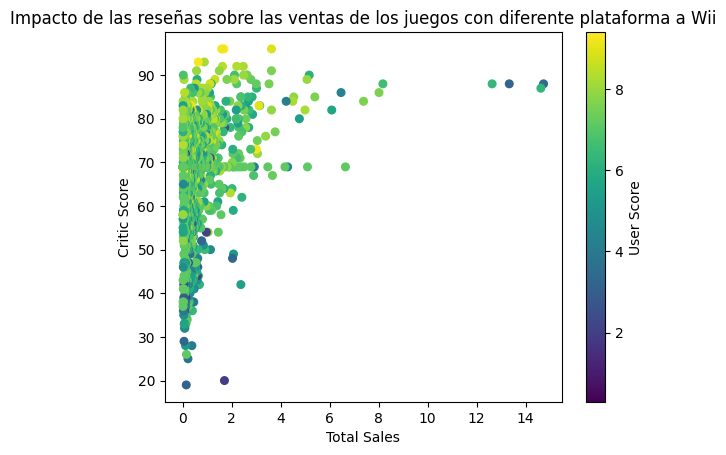

In [ ]:
# Define the colormap for the scatter plot (viridis represents green-yellow color gradient)
cmap = 'viridis'

# Create a scatter plot
plt.scatter(
    # X-axis: Total sales of Wii games from the filtered DataFrame
    df_wii_games['total_sales'],
    # Y-axis: Critic score of Wii games from the filtered DataFrame
    df_wii_games['critic_score'],
    # Color of each data point based on user score of Wii games
    c=df_wii_games['user_score'],
    # Use the defined colormap
    cmap=cmap,
    # Size of each data point
    s=30
)

# Add a colorbar to the plot representing the user score range
plt.colorbar(label='User Score')

# Label for the X-axis
plt.xlabel('Total Sales')

# Label for the Y-axis
plt.ylabel('Critic Score')

# Title for the plot
plt.title('Impacto de las reseñas sobre las ventas de los juegos con diferente plataforma a Wii')  # Impact of Reviews on Sales for Non-Wii Games)

# Display the plot
plt.show()

In [ ]:
# Filter the DataFrame to include only games released from 2005 onwards
df_from2005 = df[df['year_of_release'] >= 2005]

# Display the filtered DataFrame
df_from2005

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,68.967679,7.125046,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,68.967679,7.125046,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68.967679,7.125046,NaN,0.01


<Figure size 4000x1000 with 0 Axes>

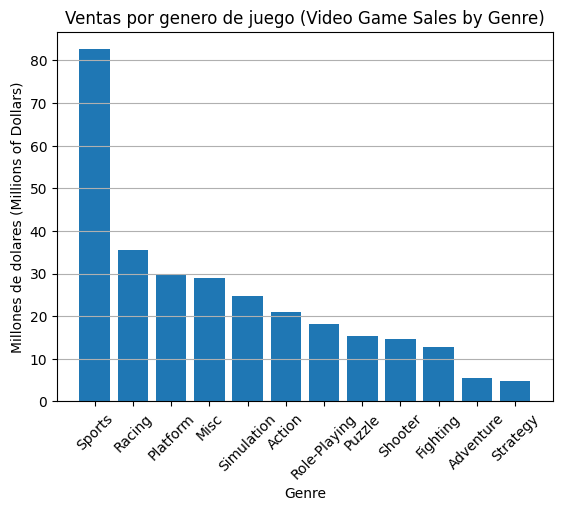

<Figure size 4000x1000 with 0 Axes>

In [ ]:
# Create a bar chart to visualize total sales per genre
plt.bar(df_from2005['genre'], df_from2005['total_sales'], label='genre')

# Set labels for the chart
plt.xlabel('Genre')  # Label for the x-axis (horizontal)
plt.ylabel('Millones de dolares (Millions of Dollars)')  # Label for the y-axis (vertical)
plt.title('Ventas por genero de juego (Video Game Sales by Genre)')  # Chart title

# Rotate x-axis labels for better readability with many genres
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Add gridlines to the chart
plt.grid(axis='y')  # Add gridlines on the y-axis

# Increase figure size for better visualization with many genres
plt.figure(figsize=(40, 10))  # Set figure width to 40 and height to 10

Notably, the genre that generates the most sales is Sports, and those that generate the least sales are Strategy and Advendure. It could not be generalized since each game varies with respect to the others in sales.

# Step 4. Create a user profile for each region

For each region (NA, EU, JP) determine:

In [ ]:
# Calculate total sales for each platform in North America
na_region = df_from2005.groupby(['platform'])['na_sales'].sum().reset_index() 
# Find the top 5 platforms with the highest sales in North America
top5_na_sales = na_region.sort_values('na_sales', ascending=False).head(5)

# Calculate total sales for each platform in Europe
eu_region = df_from2005.groupby(['platform'])['eu_sales'].sum().reset_index() 
# Find the top 5 platforms with the highest sales in Europe
top5_eu_sales = eu_region.sort_values('eu_sales', ascending=False).head(5)

# Calculate total sales for each platform in Japan
jp_region = df_from2005.groupby(['platform'])['jp_sales'].sum().reset_index()
# Find the top 5 platforms with the highest sales in Japan
top5_jp_sales = jp_region.sort_values('jp_sales', ascending=False).head(5)

# Print the top 5 platforms for each region
print(top5_na_sales)
print(top5_eu_sales)
print(top5_jp_sales)

   platform  na_sales
13     X360    595.74
11      Wii    486.87
7       PS3    390.13
2        DS    371.98
6       PS2    200.49
   platform  eu_sales
7       PS3    327.21
13     X360    268.32
11      Wii    258.32
2        DS    184.48
8       PS4    141.09
   platform  jp_sales
2        DS    171.35
0       3DS    100.62
7       PS3     79.41
9       PSP     73.85
11      Wii     68.28


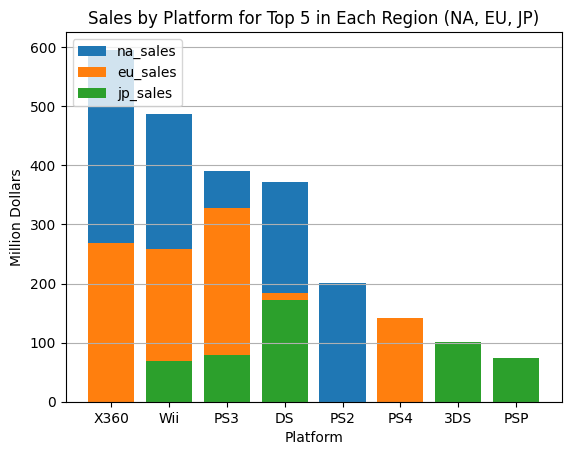

In [ ]:
# Create three bar plots, one for each region (NA, EU, JP)
plt.bar(top5_na_sales['platform'], top5_na_sales['na_sales'], label='na_sales')  # North America sales
plt.bar(top5_eu_sales['platform'], top5_eu_sales['eu_sales'], label='eu_sales')  # Europe sales
plt.bar(top5_jp_sales['platform'], top5_jp_sales['jp_sales'], label='jp_sales')  # Japan sales

# Set labels for the chart
plt.xlabel('Platform')
plt.ylabel('Million Dollars')

# Add a legend in the upper left corner to distinguish between the sales regions
plt.legend(loc='upper left')
plt.title('Sales by Platform for Top 5 in Each Region (NA, EU, JP)')

# Rotate x-axis labels for better readability if there are many platforms
plt.xticks(rotation=0)

# Add grid lines on the y-axis for better visualization
plt.grid(axis='y')

It is notable that in the North American region, more games are sold, followed by Europe and finally Japan. The platform that has the most games is X360.

In [ ]:
# Calculate total sales for each genre in North America
na_genre = df_from2005.groupby(['genre'])['na_sales'].sum().reset_index() 
# Select the top 5 genres with the highest sales in North America
top5_na_genre = na_genre.sort_values('na_sales', ascending=False).head(5)

# Calculate total sales for each genre in Europe
eu_genre = df_from2005.groupby(['genre'])['eu_sales'].sum().reset_index() 
# Select the top 5 genres with the highest sales in Europe
top5_eu_genre = eu_genre.sort_values('eu_sales', ascending=False).head(5)

# Calculate total sales for each genre in Japan
jp_genre = df_from2005.groupby(['genre'])['jp_sales'].sum().reset_index() 
# Select the top 5 genres with the highest sales in Japan
top5_jp_genre = jp_genre.sort_values('jp_sales', ascending=False).head(5)

# Print the top 5 genres for each region
print(top5_na_genre)
print(top5_eu_genre)
print(top5_jp_genre)

           genre  na_sales
0         Action    580.04
10        Sports    432.70
8        Shooter    400.96
3           Misc    311.82
7   Role-Playing    211.85
      genre  eu_sales
0    Action    372.58
10   Sports    265.61
8   Shooter    248.07
3      Misc    167.09
6    Racing    129.05
           genre  jp_sales
7   Role-Playing    179.60
0         Action    108.39
3           Misc     72.49
10        Sports     52.51
4       Platform     36.32


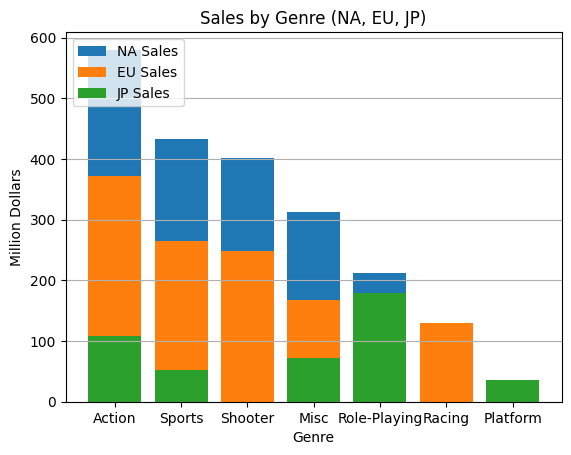

In [ ]:
# Create three bar plots for NA, EU, and JP sales on the same chart
plt.bar(top5_na_genre['genre'], top5_na_genre['na_sales'], label='NA Sales')  # Plot NA sales bar graph
plt.bar(top5_eu_genre['genre'], top5_eu_genre['eu_sales'], label='EU Sales')  # Plot EU sales bar graph
plt.bar(top5_jp_genre['genre'], top5_jp_genre['jp_sales'], label='JP Sales')  # Plot JP sales bar graph

# Set labels for the chart
plt.xlabel('Genre')  # Label for the x-axis (horizontal)
plt.ylabel('Million Dollars')  # Label for the y-axis (vertical)

# Add a legend to distinguish between the bars
plt.legend(loc='upper left')  # Place the legend in the upper left corner

# Set the chart title
plt.title('Sales by Genre (NA, EU, JP)')  # Title for the chart

# Rotate x-axis labels for better readability if there are many genres
plt.xticks(rotation=0)

# Add gridlines to the chart
plt.grid(axis='y')  # Add gridlines on the y-axis

In [ ]:
# Check if ESRB ratings affect sales in individual regions

# Calculate total NA sales for each rating
na_rating = df_from2005.groupby(['rating'])['na_sales'].sum().reset_index()
top5_na_rating = na_rating.sort_values('na_sales', ascending=False).head(5) 

# Calculate total EU sales for each rating
eu_rating = df_from2005.groupby(['rating'])['eu_sales'].sum().reset_index()
top5_eu_rating = eu_rating.sort_values('eu_sales', ascending=False).head(5)

# Calculate total JP sales for each rating
jp_rating = df_from2005.groupby(['rating'])['jp_sales'].sum().reset_index()
top5_jp_rating = jp_rating.sort_values('jp_sales', ascending=False).head(5)

# Print the top 5 ratings by sales for each region
print(top5_na_rating)
print(top5_eu_rating)
print(top5_jp_rating)

  rating  na_sales
1      E    873.10
4      M    607.34
6      T    479.08
2   E10+    343.02
3     EC      1.53
  rating  eu_sales
1      E    508.71
4      M    414.11
6      T    258.17
2   E10+    181.92
0     AO      0.61
  rating  jp_sales
1      E    147.33
6      T     91.32
4      M     46.23
2   E10+     39.05
0     AO      0.00


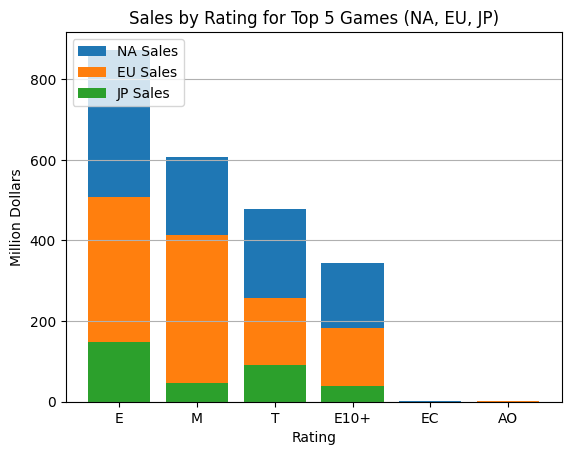

In [ ]:
# Create bar charts for NA, EU, and JP sales
plt.bar(top5_na_rating['rating'], top5_na_rating['na_sales'], label='NA Sales')  # Plot NA sales on x-axis (rating) vs y-axis (sales)
plt.bar(top5_eu_rating['rating'], top5_eu_rating['eu_sales'], label='EU Sales')  # Plot EU sales on same chart
plt.bar(top5_jp_rating['rating'], top5_jp_rating['jp_sales'], label='JP Sales')  # Plot JP sales on same chart

# Add labels and title for the chart
plt.xlabel('Rating')  # Label for x-axis (rating)
plt.ylabel('Million Dollars')  # Label for y-axis (sales in millions)
plt.legend(loc='upper left')  # Add legend in upper left corner to distinguish between sales regions
plt.title('Sales by Rating for Top 5 Games (NA, EU, JP)')  # Title for the chart

# Rotate x-axis labels for better readability if many ratings
plt.xticks(rotation=0)

# Add gridlines for better visualization
plt.grid(axis='y')

The rating does affect, games with rating E sell more, games with rating EC, AO, RP almost do not generate sales.

# Step 5. Test the following hypotheses:

In [ ]:
df_from2005

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,68.967679,7.125046,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,68.967679,7.125046,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68.967679,7.125046,NaN,0.01


In [ ]:
# Filter the DataFrame to include only games for the 'XOne' platform
score_xone = df_from2005[df_from2005['platform'] == 'XOne'][['user_score']] 

# Drop rows with missing values in the 'user_score' column
score_xone = score_xone.dropna(subset=['user_score']) 

# Display the resulting DataFrame containing user scores for XOne games 
score_xone

,user_score
99,7.125046
165,7.900000
179,5.400000
242,6.400000
270,6.200000
...,...
16630,8.200000
16643,6.600000
16645,7.125046
16660,6.700000


In [ ]:
# Filter the DataFrame to include only games released on PC after 2005
score_PC = df_from2005[df_from2005['platform'] == 'PC'][['user_score']] 

# Remove rows with missing values in the 'user_score' column
score_PC = score_PC.dropna(subset=['user_score']) 

# Display the resulting DataFrame containing user scores for PC games
score_PC

,user_score
85,7.600000
192,4.000000
218,8.200000
288,7.900000
313,8.100000
...,...
16690,7.125046
16692,7.600000
16696,5.800000
16702,7.200000


In [ ]:
# Define the null and alternative hypotheses
# H0: The average user score for Xbox One is equal to the average user score for PC.
# H1: The average user score for Xbox One is not equal to the average user score for PC.

# Set the significance level (alpha)
alpha = 0.05 

# Perform an independent two-sample t-test 
results = st.ttest_ind(score_xone, score_PC) 

# Print the p-value
print('p-value:', results.pvalue)

# Make a decision based on the p-value
if results.pvalue < alpha:
    print('Reject the null hypothesis.') 
else:
    print('Fail to reject the null hypothesis.')

p-value: [0.0081339]
Reject the null hypothesis.


In [ ]:
# Filter the DataFrame to include only games with the 'Action' genre
score_action = df_from2005[df_from2005['genre'] == 'Action'][['user_score']] 

# Remove rows with missing values in the 'user_score' column
score_action = score_accion.dropna(subset=['user_score']) 

# Display the resulting DataFrame 
score_action

,user_score
16,8.200000
23,8.100000
42,8.300000
46,7.125046
51,7.900000
...,...
16680,7.125046
16691,7.125046
16692,7.600000
16699,7.125046


In [ ]:
# Filter the DataFrame to include only games with the 'Sports' genre
score_sports = df_from2005[df_from2005['genre'] == 'Sports'][['user_score']] 

# Remove rows with missing values in the 'user_score' column
score_sports = score_sports.dropna(subset = ['user_score']) 

# Display the resulting DataFrame 
score_sports

,user_score
0,8.000000
3,8.000000
13,7.700000
15,7.400000
77,4.300000
...,...
16656,7.125046
16676,7.125046
16688,7.125046
16700,7.125046


In [ ]:
# H0: The variance of user scores for Action and Sports genres is equal.
# H1: The variance of user scores for Action and Sports genres is not equal.

alpha = 0.05  # Significance level
result = levene(score_action['user_score'], score_sports['user_score'])  # Levene's test for equality of variances

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Reject the null hypothesis. The variances of user scores for Action and Sports genres are significantly different.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to conclude that the variances of user scores for Action and Sports genres are different.')

p-value: 0.0005540850206234054
Reject the null hypothesis. The variances of user scores for Action and Sports genres are significantly different.


In [ ]:
# Hypothesis testing: Are the average user scores for Action and Sports genres different?

# Null hypothesis (H0): The mean user score for the Action genre is equal to the mean user score for the Sports genre.
# Alternative hypothesis (H1): The mean user score for the Action genre is not equal to the mean user score for the Sports genre.

alpha = 0.05  # Significance level

# Perform an independent two-sample t-test, assuming unequal variances
results = st.ttest_ind(score_accion, score_sports, equal_var=False)

# Print the p-value
print('p-value:', results.pvalue)

# Compare the p-value to the significance level
if results.pvalue < alpha:
    print('Reject the null hypothesis. The average user scores for Action and Sports genres are significantly different.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to conclude that the average user scores for Action and Sports genres are different.')

p-value: [2.56208842e-08]
Reject the null hypothesis. The average user scores for Action and Sports genres are significantly different.


The null hypothesis is always an equality, in both cases the null hypothesis is the equality between the averages of the user_score of both datasets, in this case we create two df with the specified conditions and then compare them using the st.ttest_ind function that is It is used to test the hypothesis that the means of two statistical populations are equal according to the samples taken, taking into account the test of equal variances previously carried out.

# Conclusion

It was analyzed that the game platforms that generate the most sales are Wii and X360, taking relevant data since 2005; The distributions of the 6 most popular video game platforms were analyzed through box plots, histograms and bar charts. It is determined that the most sold genre is the sports genre. Video game sales are affected by the game's rating and by critical and user reviews.
We reject the hypothesis that the averages of user reviews are the same for action and sports genres and for Xbox One and PC platforms, through the scipy.stats.ttest_ind function.